## Model: the Responsible Business Simulator (tRBS)
In this notebook the core (calculation) steps of the tRBS model are illustrated.

### `TheResponsibleBusinessSimulator` class
In order to work with the Responsible Business Simulator model, we will work with the ```TheResponsibleBusinessSimulator``` class. This class can be found in **core/trbs.py**. This class takes three input values: (i) the folder where data of the case can be found, (ii) the format of the data (options: xlsx, json, csv) and (iii) the name of the case (options: Beerwiser).

In [1]:
from pathlib import Path
from core.trbs import TheResponsibleBusinessSimulator

# Specify your case and format. By default we use Beerwiser in xlsx format.
path = Path.cwd() / 'data'
file_format = 'xlsx'
name = 'izz'

case = TheResponsibleBusinessSimulator(path, file_format, name)

Let's see how ```case``` looks currently:

In [2]:
print(case)

Case: izz (xlsx) 
Data location: C:\Users\mverdaasdo001\Documents\RBS_open_source\trbs\model\data 
Input data: 
 First .build() a case to import data


Currently, it is rather empty. To get the input data, we will first need to ```build``` our case.

In [4]:
case.build()
print(case)

Creating 'izz'
Hierarchy calculated in 29 iterations
Case: izz (xlsx) 
Data location: C:\Users\mverdaasdo001\Documents\RBS_open_source\trbs\model\data 
Input data: 
 configurations
	[]

configuration_value
	[]

key_outputs
	['Decrease in absenteeism %' 'Decrease in staff turnover %'
 'Increase in customer satisfaction' 'Increase in employee satisfaction'
 'Decrease in absenteeism costs' 'Decrease in staff turnover costs'
 'Decrease in wage costs' 'Increase in production capacity'
 'Total investment']

key_output_theme
	['People' 'People' 'People' 'People' 'Profit' 'Profit' 'Profit' 'Profit'
 'Profit']

key_output_monetary
	[0 0 0 0 1 1 1 0 1]

key_output_smaller_the_better
	[0 0 0 0 0 0 0 1 0]

key_output_linear
	[0 0 0 0 0 0 0 0 0]

key_output_automatic
	[1 1 1 1 1 1 1 1 1]

key_output_start
	[nan nan nan nan nan nan nan nan nan]

key_output_end
	[nan nan nan nan nan nan nan nan nan]

key_output_threshold
	[nan nan nan nan nan nan nan nan nan]

decision_makers_options
	['Mix' 'Physica

### Calculate key output values
Now that we have a decent set-up of our case, we can `evaluate` it. Cases are evaluated using the following iterative four-step proces. 
1. `evaluate_single_dependency` is the smallest calculation step. It takes both arguments from a **single dependency row** and applies the provided operator. This is calculated for a fixed decision makers option (dmo) and fixed scenario. <br>
_e.g. this function will calculate 'Effect of training' as 'Investment' / 'Effectiveness'. The fixed decision makers option and fixed scenario is used (when needed) to find the correct values for the internal variable ('Investment') and external variable ('Effectivess')._
<br>

2. `evaluate_all_dependencies` calculates all singular calculated dependencies to evaluate the full outcome for a case for a fixed decision makers option and fixed scenario. <br>
_e.g. this function will calculate the values of the key outputs for the 'Base case' with a 'Focus on water recycling'._
<br>

3. `evaluate_selected_scenario` calculates all full outcomes for a case for **all decision makers options** and single given scenario. <br>
_e.g. this function will calculate a set of values of the key outputs for the 'Base case' for each option that is available to the decision makers, that is, one set for 'Focus on water recycling', one set for 'Focus on training' and one set for 'Equal spread'._
<br>

4. `evaluate_all_scenarios` calculates all sets of key output values for **all decision makers options** and **all scenarios**. 

The process is iterative. So, when calling `evaluate` step 4 is called that will call the other functions. This process is visualised below:

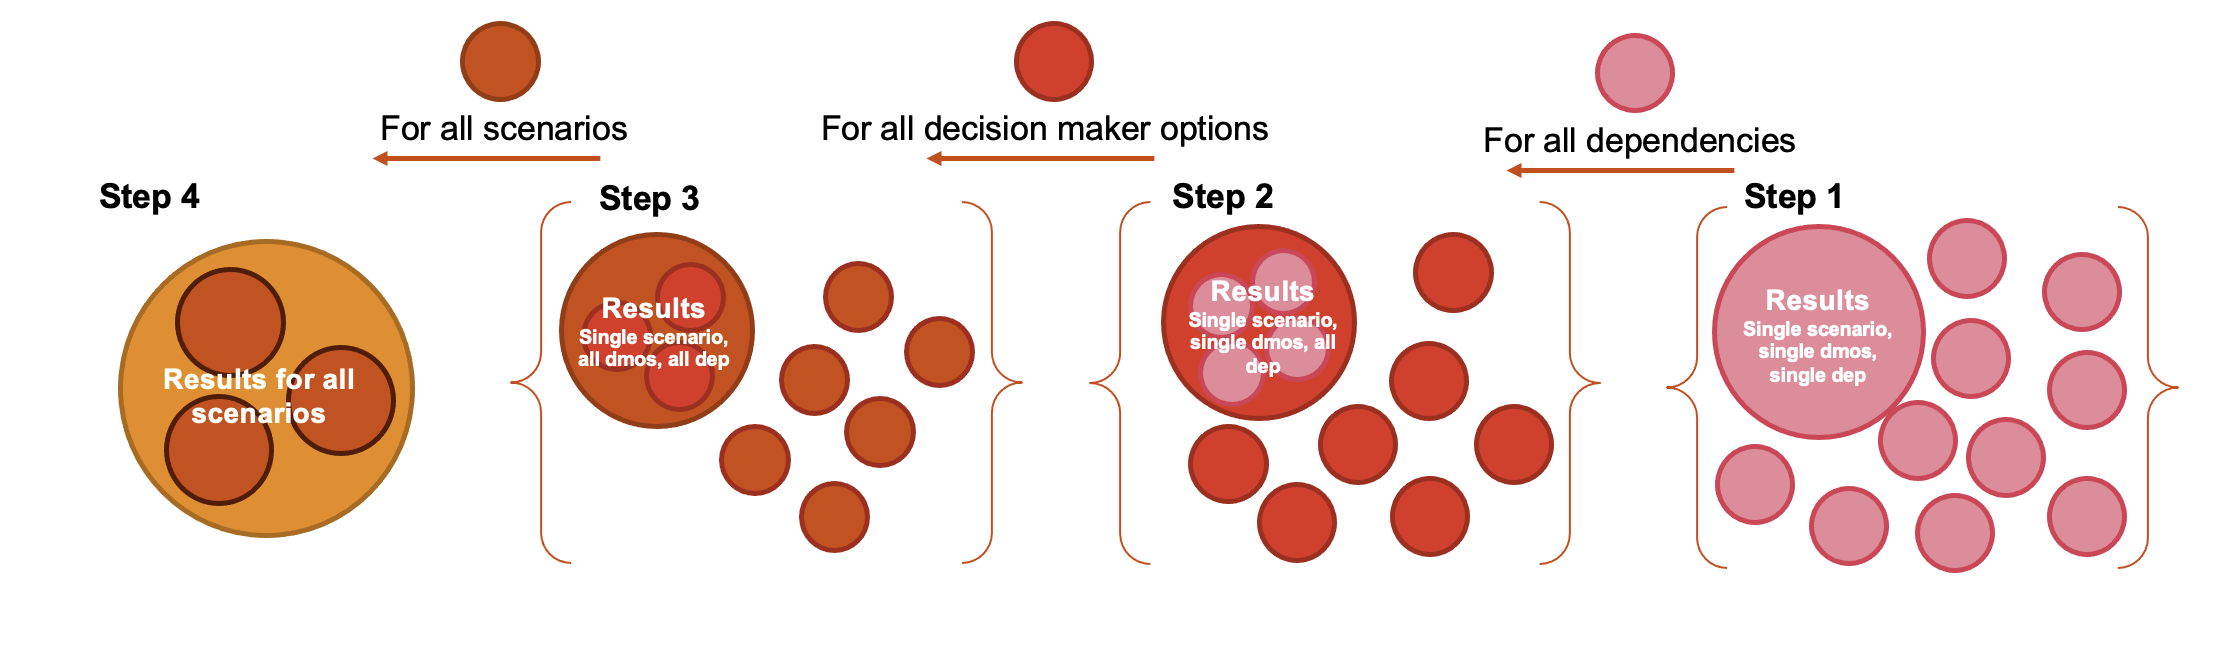

In [5]:
case.evaluate()

- Evaluated 'Base case' successfully for all decision makers options!
- Evaluated 'Optimistic' successfully for all decision makers options!
- Evaluated 'Pessimistic' successfully for all decision makers options!


The `evaluate` function creates an output dictionary (`output_dict`) for our `case`. This dictionary contains all the results of our case and is structured as a nested dictionary with the following structure: 

{'Scenario A': <br>
   { <br>
    'Decision Makers Option I': <br>
        {<br>
        'key_outputs': {'Key Output X': value, ..}<br>
        }<br>
    'Decision Makers Option II': {..}<br>
    }<br>
'Scenario B': {..}<br>
}

In [6]:
case.output_dict['Base case']

{'Mix': {'key_outputs': {'Decrease in absenteeism %': 5.392116031453006e-06,
   'Decrease in staff turnover %': 6.27340425555557e-06,
   'Increase in customer satisfaction': 0.011579758666666606,
   'Increase in employee satisfaction': 0.0445375333333331,
   'Decrease in absenteeism costs': 17583.928864857153,
   'Decrease in staff turnover costs': 706.1304710828977,
   'Decrease in wage costs': 10675489.774988197,
   'Increase in production capacity': 480.5106005104856,
   'Total investment': 120000.0}},
 'Physical': {'key_outputs': {'Decrease in absenteeism %': 6.233145107692266e-06,
   'Decrease in staff turnover %': 1.0212499999999957e-05,
   'Increase in customer satisfaction': 0.02111849999999997,
   'Increase in employee satisfaction': 0.08122499999999988,
   'Decrease in absenteeism costs': 20386.24033153279,
   'Decrease in staff turnover costs': 826.7250722784947,
   'Decrease in wage costs': 12394629.20284573,
   'Increase in production capacity': 584.8268560215384,
   'Tota

### Process key output values
Now that we have evaluated the dependencies, we can start to compare the key outputs. In order to do this we `appreciate` the key output values in our case. A five-step approach is introduced when appreciating the outputs:
1. `appreciate_single_key_output` transforms a key output value into an **appreciated value**. This is done by a (non)-linear appreciation based on the minimum and maximum values of that specific key output throughout the case (so based on values of key outputs in all scenarios and decision makers options). For each (scenario, decision makers option) combination
<br>

2. `apply_weights` applies theme and key output weights to the calculated appreciations under Step 1. These weights are model inputs determined based on strategic priorities. This function gives us a set of **weighted appreciations** of the key outputs for each (scenario, decision makers option) combination. 
<br>

3. `decision_makers_option_appreciations` aggregates the weighted appreciations of key outputs into a single **aggregated appreciation** per decision makers option and scenario.
<br>

4. (**NOT YET IMPLEMENTED**) `apply_scenario_weights` applies scenario weights to the calculated appreciation under Step 3. This function gives us a value of **scenario weighted appreciations** for each decision makers option and scenario.
<br>

5. (**NOT YET IMPLEMENTED**) `scenario_appreciations` aggregates the scenario weighted appreciations into a single value for each decision makers option.

In [7]:
case.appreciate()

Key output values have been processed | Appreciated, weighted & aggregated


The `appreciate` function extends our existing output dictionary with information about the appreciation & weighted appreciation. The extended structure looks as follows:

{'Scenario A': <br>
   { <br>
    'Decision Makers Option I': <br>
        {<br>
        'key_outputs': {'Key Output X': value, ..}<br>
        **'appreciations': {'Key Output X': value, ..}<br>
        'weighted_appreciations': {'Key Output X': value, ..}**<br>
        }<br>
    'Decision Makers Option II': {..}<br>
    }<br>
'Scenario B': {..}<br>
}

In [8]:
case.output_dict['Base case']

{'Mix': {'key_outputs': {'Decrease in absenteeism %': 5.392116031453006e-06,
   'Decrease in staff turnover %': 6.27340425555557e-06,
   'Increase in customer satisfaction': 0.011579758666666606,
   'Increase in employee satisfaction': 0.0445375333333331,
   'Decrease in absenteeism costs': 17583.928864857153,
   'Decrease in staff turnover costs': 706.1304710828977,
   'Decrease in wage costs': 10675489.774988197,
   'Increase in production capacity': 480.5106005104856,
   'Total investment': 120000.0},
  'appreciations': {'Decrease in absenteeism %': 40.38690252589629,
   'Decrease in staff turnover %': 58.806188257055915,
   'Increase in customer satisfaction': 49.52003185571622,
   'Increase in employee satisfaction': 60.15863247325799,
   'Decrease in absenteeism costs': 43.479098010982135,
   'Decrease in staff turnover costs': 46.28121828983527,
   'Decrease in wage costs': 44.73368068794747,
   'Increase in production capacity': 58.23938680252464,
   'Total investment': 0},
  '

### Visualization of output
Having evaluated and appreciated the full case, it is time to start creating some visuals. We will do this using the generated `output_dict` and the `visualize` function. This function uses a display format (currently 'table' or 'barchart') and the key of the result as stored in `output_dict` (e.g. `key_outputs` or `weighted_appreciations`).

Visualizations are generated using the following rules:

- `table`: 2- or 3-dimensional tables. Rows contain scenarios and/or key outputs (both if 3-dimensional, choose one if 2-dimensional). Columns are decision makers options. 
- `barchart`:
    - 3-dimensional is not possible. Specify a scenario if the `key` in the `output_dict` is associated with three dimensions
    - 1 or 2-dimensional: decision makers options are always on the horizontal axis. For 2-dimensional barchart it can be either stacked (`stacked=True`) or dodged (`stacked=False`). 

In [9]:
case.visualize('table', 'key_outputs', scenario='Base case')

Comparing key outputs for each decision makers option can become difficult: the ranges of the three key outputs vary wildly. For better comparisons, we can therefore look at the weighted appreciations:

In [10]:
case.visualize('table', 'weighted_appreciations', scenario="Base case")

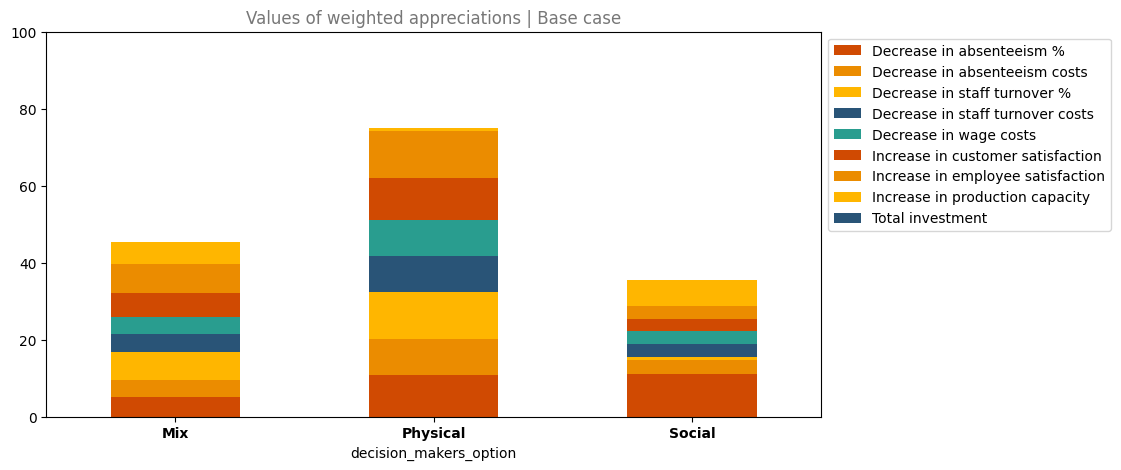

In [11]:
case.visualize('barchart', 'weighted_appreciations', scenario="Base case", stacked=True)

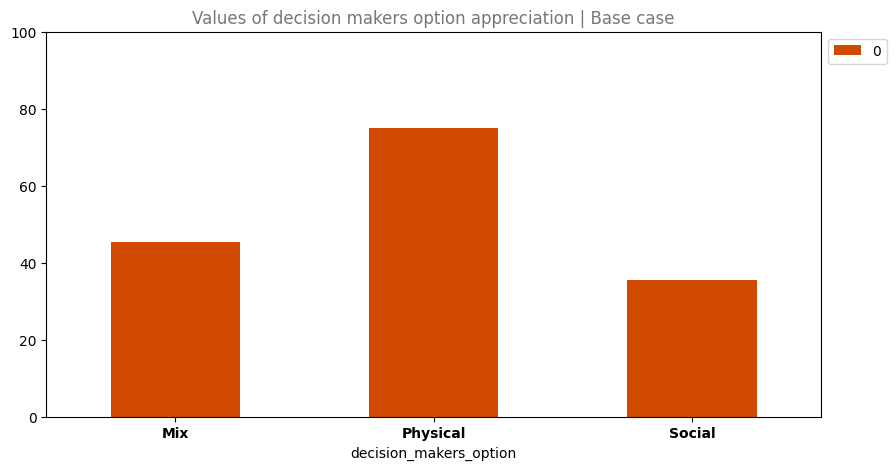

In [12]:
case.visualize('barchart', 'decision_makers_option_appreciation', scenario='Base case')

### Transforming the case into a different format (optional)
We can transform a case into a different format. The `transform` function creates a folder named as the file extension and stores this at the provided location (here: in the folder where the repo is stored)

In [29]:
output_path = Path.cwd() / 'data' / name 
case.transform(output_path, "json")
# case.transform(output_path, "xlsx")
case.transform(output_path, "csv")